In [1]:
import sys
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import copy

In [10]:
n1 = 10 # cantidad de ciudades
n2 = 5  # cantidad de viajes
n3 = 10  # distancia máxima
a = 0
distance = np.zeros([n1,n1])
moves = np.zeros([n2, 2])

In [11]:
while (np.linalg.matrix_rank(a)!=n1):
    a = np.random.randint(n3, size=(n1,n1))
    np.fill_diagonal(a,0)
    a = np.tril(a) + np.tril(a, -1).T
print("Matriz de rutas: \n{}".format(a))

Matriz de rutas: 
[[0 8 5 5 7 6 9 0 2 4]
 [8 0 6 0 5 6 3 2 9 6]
 [5 6 0 0 2 3 6 0 7 4]
 [5 0 0 0 5 0 0 9 4 4]
 [7 5 2 5 0 2 6 1 4 0]
 [6 6 3 0 2 0 8 6 1 4]
 [9 3 6 0 6 8 0 6 1 0]
 [0 2 0 9 1 6 6 0 7 1]
 [2 9 7 4 4 1 1 7 0 3]
 [4 6 4 4 0 4 0 1 3 0]]


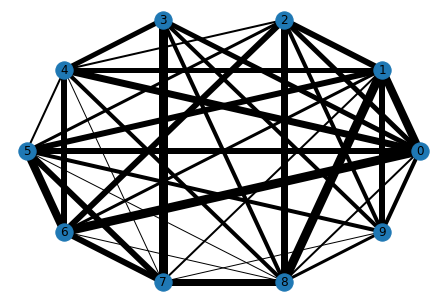

In [12]:
net1 = nx.from_numpy_matrix(copy.deepcopy(a))
net2 = nx.from_numpy_matrix(copy.deepcopy(a))
for e in net1.edges():
    net2[e[0]][e[1]]['color'] = 'black'

edge_weights_list = [net2[e[0]][e[1]]['weight'] for e in net2.edges()]
nx.draw_circular(net2, with_labels=True, width=edge_weights_list)
plt.show()

In [13]:
rng = np.random.default_rng()
for i in range(n2):
    moves[i,:] = rng.choice(n1, size=2, replace=False)
print("Matriz de movimientos: \n{}".format(moves))

Matriz de movimientos: 
[[6. 1.]
 [5. 3.]
 [2. 7.]
 [2. 4.]
 [3. 5.]]


In [14]:
colores = []
for i in range(n2):
    color = np.base_repr(np.random.choice(16777215), base=16)
    colores.append('#{:0>6}'.format(color))

In [15]:
caminos_total = []
k_si = 0
k_no = 0
for j in range(n2):
    try:
        p = nx.dijkstra_path(net1,int(moves[j,0]),int(moves[j,1]))
        print("{:0>3} - Para llegar desde {} hasta {} hay que hacer el siguiente camino: {}".format(j+1, moves[j,0],moves[j,1], p))
        caminos_total.append(np.array(p))
        k_si += 1
        for i in range(len(p)-1):
            net2[p[i]][p[i+1]]['color'] = colores[j]
            net2[p[i]][p[i+1]]['weight'] = a[p[i], p[i+1]]
            print("      La distancia entre {} y {} es: {}".format(p[i], p[i+1], net2[p[i]][p[i+1]]['weight']))
            net1.remove_edge(p[i],p[i+1])        
    except:
        print("{:0>3} - NO SE PUEDE CONECTAR EL PUNTO {} CON EL PUNTO {}.".format(j+1, int(moves[j,0]),int(moves[j,1])))  
        k_no += 1   

001 - Para llegar desde 6.0 hasta 1.0 hay que hacer el siguiente camino: [6, 1]
      La distancia entre 6 y 1 es: 3
002 - Para llegar desde 5.0 hasta 3.0 hay que hacer el siguiente camino: [5, 8, 3]
      La distancia entre 5 y 8 es: 1
      La distancia entre 8 y 3 es: 4
003 - Para llegar desde 2.0 hasta 7.0 hay que hacer el siguiente camino: [2, 4, 7]
      La distancia entre 2 y 4 es: 2
      La distancia entre 4 y 7 es: 1
004 - Para llegar desde 2.0 hasta 4.0 hay que hacer el siguiente camino: [2, 5, 4]
      La distancia entre 2 y 5 es: 3
      La distancia entre 5 y 4 es: 2
005 - Para llegar desde 3.0 hasta 5.0 hay que hacer el siguiente camino: [3, 9, 5]
      La distancia entre 3 y 9 es: 4
      La distancia entre 9 y 5 es: 4


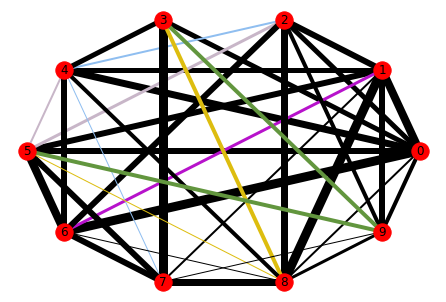

In [16]:
edge_color_list = [net2[e[0]][e[1]]['color'] for e in net2.edges()]
edge_weights_list = [net2[e[0]][e[1]]['weight'] for e in net2.edges()]
nx.draw_circular(net2,node_color='red',edge_color = edge_color_list, with_labels = True, width=edge_weights_list)
plt.show()

In [17]:
caminos_total = np.array(caminos_total)
distancia_total = 0
for i in range(caminos_total.shape[0]):
    for j in range(caminos_total[i].shape[0]-1):
        if (caminos_total[i][j] != caminos_total[i][j+1]):
            distancia_total += net2[caminos_total[i][j]] [caminos_total[i][j+1]]['weight']
f_cost = (distancia_total) + (n3 * 2 * k_no)   

print("La distancia total recorrida es:", distancia_total)
print("Cantidad de autos que sí llegaron a destino:",k_si)
print("Cantidad de autos que no llegaron a destino:",k_no)
print("Distancia promedio de caminos que llegaron a destino:", (distancia_total/k_si))
print("\nFunción de coste =", f_cost)

La distancia total recorrida es: 24
Cantidad de autos que sí llegaron a destino: 5
Cantidad de autos que no llegaron a destino: 0
Distancia promedio de caminos que llegaron a destino: 4.8

Función de coste = 24
